In [ ]:
import numpy as np
import netCDF4 as nc

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,12)
%matplotlib inline



In [56]:
gridfile='grid_info.nc'
grinf=nc.Dataset(gridfile,'a')
lats_2d=grinf.variables['latitude'][:]
lons_2d=grinf.variables['longitude'][:]
grindex=grinf.variables['land_index'][:]
grinf.close()



In [49]:
lats_1d=ammf.variables['latitude'][:]
lons_1d=ammf.variables['longitude'][:]
land_index=np.zeros_like(lats_2d,dtype='int')-1

for ipt in range(len(lats_1d)):
    
    lat,lon = lats_1d[ipt],lons_1d[ipt]
    
    land_index[ (lats_2d==lat)&(lons_2d==lon) ] = ipt

land_index=np.ma.masked_equal(land_index,-1)

outvar=grinf.createVariable('land_index','i',('y','x'),fill_value=-1)
outvar.description = "Index to put land points on to 2D grid" 
outvar[:]=land_index
grinf.close()


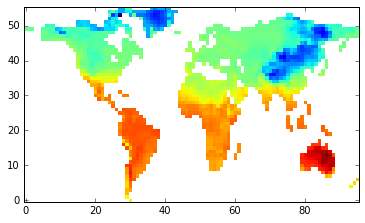

In [58]:
plot_data=np.ma.masked_array(t_soil[0,land_index],mask=land_index.mask)
plt.imshow(plot_data,origin='bottom',interpolation='nearest')

In [38]:
infile='vn4.7_imogen.spinup_409.dump.18600101.0.noNAN.nc'
ammf=nc.Dataset(infile,'a')


In [5]:

DATA_DICT={}

for var in ammf.variables:
    print(var)
    DATA_DICT[var]=ammf.variables[var][:]
    if len(np.where(np.isnan(DATA_DICT[var]))[0])>0:
        print(len(np.where(np.isnan(DATA_DICT[var]))[0]))
    #if var not in ['co2_ppmv','co2_change_ppmv','dtemp_o','seed_rain','co2_mmr']:
    #    print(DATA_DICT[var].reshape(-1,DATA_DICT[var].shape[-1])[:,1538])


canopy
cs
gs
snow_tile
t_soil
tstar_tile
sthuf
lai
canht
frac_agr_prev
wood_prod_fast
wood_prod_med
wood_prod_slow
frac_past_prev
sthzw
zw
rgrain
tsoil_deep
co2_ppmv
co2_change_ppmv
dtemp_o
fa_ocean
seed_rain
cv
rho_snow
snow_depth
snow_grnd
nsnow
snow_ds
snow_ice
snow_liq
tsnow
rgrainl
frac
b
sathh
satcon
sm_sat
sm_crit
sm_wilt
hcap
hcon
albsoil
clay
fexp
ti_mean
ti_sig
frac_agr
co2_mmr
latitude
longitude


In [6]:
# correct NaN values
fill_vars=['snow_tile','tstar_tile','wood_prod_fast',\
           'wood_prod_med','wood_prod_slow','sthzw','zw','rho_snow','frac']
fill_vals=[0.,273.,0.,0.,0.,1.,25.,109.0,1e-6]
for var,fill_value in zip(fill_vars,fill_vals):
    print(var, fill_value)
    DATA_DICT[var][np.isnan(DATA_DICT[var])] = \
            fill_value
    ammf.variables[var][:]=DATA_DICT[var]
        

snow_tile 0.0
tstar_tile 273.0
wood_prod_fast 0.0
wood_prod_med 0.0
wood_prod_slow 0.0
sthzw 1.0
zw 25.0
rho_snow 109.0
frac 1e-06


In [7]:
ti_mean=ammf.variables['ti_mean'][:]
ti_sig=ammf.variables['ti_sig'][:]


In [8]:
badex=np.where(ti_mean<0)
while len(badex[0])>0:
    ti_mean[badex]=ti_mean[badex[0]-1]
    badex=np.where(ti_mean<0)

In [9]:
badex=np.where(ti_sig<0)
while len(badex[0])>0:
    ti_sig[badex]=ti_sig[badex[0]-1]
    badex=np.where(ti_sig<0)

In [10]:
ammf.variables['ti_mean'][:]=ti_mean
ammf.variables['ti_sig'][:]=ti_sig

In [11]:

tstar=ammf.variables['tstar_tile'][:]
#tstar[tstar<200]=np.min(tstar[tstar>200])
print(tstar.shape)

print(tstar[tstar<200])
print(np.where(tstar<200))


(17, 1631)
[]
(array([], dtype=int64), array([], dtype=int64))


In [12]:
t_soil=ammf.variables['t_soil'][:]
frac=ammf.variables['frac'][:]
print(t_soil.shape)

# replace zero values for value in layer below. These only occur in top layer
ilayer = 0
badex=np.where(t_soil[ilayer,:]==0)
print(badex)
print(t_soil[ilayer,badex])
t_soil[ilayer,badex]=t_soil[ilayer+1,badex]
print(t_soil[ilayer,badex])


# 4 soil columns remain with t_soil<1k for whole column, 
# replace with neighbouring soil column until none remain
badex=np.where(t_soil[ilayer,:]<1)
while len(badex[0])>0:
    t_soil[:,badex[0]]=t_soil[:,badex[0]-1]
    badex=np.where(t_soil[ilayer,:]<1)
    
#for ilayer in range(14):
#    badex=np.where(t_soil[ilayer,:]<200)
#    print(badex)
#    print(t_soil[ilayer,badex])
#    print(t_soil[ilayer,badex[0]-1])
#    #print(frac[:,badex])

#=np.min(t_soil[t_soil>200])




(14, 1631)
(array([], dtype=int64),)
[]
[]


In [13]:
#print(t_soil[:,[1359, 1430, 1431, 1432, 1492, 1538]])

In [14]:
ammf.variables['t_soil'][:]=t_soil
ammf.variables['tstar_tile'][:]=tstar

In [15]:
#for var in ammf.variables:
#    print(var)
#    if var not in ['co2_ppmv','co2_change_ppmv','dtemp_o','seed_rain','co2_mmr']:
#        temp_data=ammf.variables[var][:]
#        temp_data=temp_data.reshape(-1,temp_data.shape[-1])
#        print(temp_data[:,1539])
    

In [21]:
#print(DATA_DICT['frac'][:,1359])
sum_frac=np.sum(DATA_DICT['frac'],axis=0)
#print(sum_frac[1539])
sum_frac.shape
badex=np.where(sum_frac<0.99)
len(badex[0])
fill_lc_index=15  # soil
#for pt in badex[0]:
#    print(sum_frac[pt])
#    print(DATA_DICT['frac'][:,pt])
#    print(DATA_DICT['sm_sat'][:,pt])
#    print(DATA_DICT['latitude'][pt],DATA_DICT['longitude'][pt])
#    DATA_DICT['frac'][fill_lc_index,pt] = 1-sum_frac[pt]
    
#ammf.variables['frac'][:]=DATA_DICT['frac']
    

In [22]:
badex

(array([], dtype=int64),)

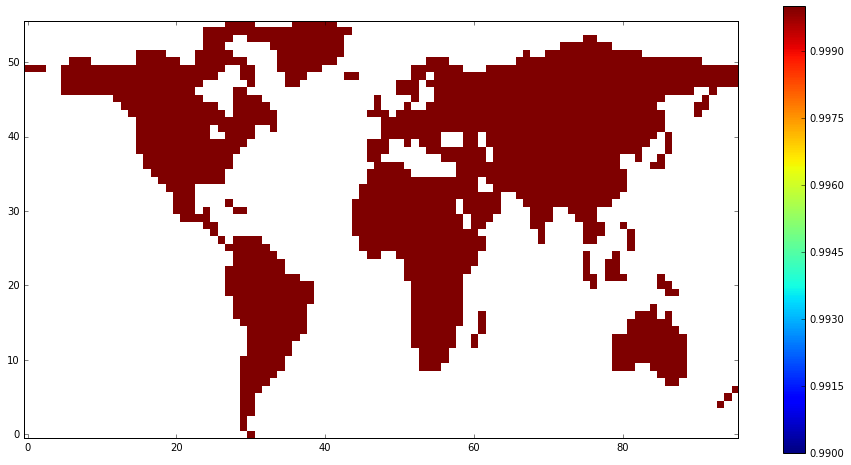

In [32]:
plt.figure(figsize=(16,8))
plot_data=np.ma.masked_array(sum_frac[grindex],mask=grindex.mask)
plt.imshow(plot_data,origin='bottom',interpolation='nearest',vmin=0.99,vmax=1)
plt.colorbar()

In [33]:
ammf.variables['frac'][:]=DATA_DICT['frac']

In [34]:
ammf.close()

grinvar=grinf.createVariable('land_index','float32',('y','x'),fill_value=-1)
grinvar.units='-'
grinvar.description='Index to put land points on to 2D grid'
grinvar[:]=land_index


In [ ]:
grinf.close()

In [ ]:
var='snow_tile'
fill_value=0
#plt.imshow(DATA_DICT[var][0,land_index][30:,25:50],origin='bottom')
#plt.colorbar()
#plt.show()

if var in DATA_DICT:
    DATA_DICT[var][np.isnan(DATA_DICT[var])] = \
            fill_value

#plt.imshow(np.ma.masked_array(DATA_DICT[var][0,land_index],mask=land_index.mask)[30:,25:50],origin='bottom')
#plt.colorbar()
#plt.show()


In [ ]:
var='tstar_tile'
fill_value=273.15
#plt.imshow(DATA_DICT[var][0,land_index][30:,25:50],origin='bottom')
#plt.colorbar()
#plt.show()

if var in DATA_DICT:
    DATA_DICT[var][np.isnan(DATA_DICT[var])] = \
            fill_value

#plt.imshow(np.ma.masked_array(DATA_DICT[var][0,land_index],mask=land_index.mask)[30:,25:50],origin='bottom')
#plt.colorbar()
#plt.show()

In [ ]:
fill_vars=['snow_tile','tstar_tile','wood_prod_fast','wood_prod_med','wood_prod_slow','sthzw','zw','rho_snow','frac']
fill_vals=[0.,273.15,0.,0.,0.,1.,25.,109.0,1e6]
for var,fill_value in zip(fill_vars,fill_vals):
    print(var, fill_value)
    #if len(DATA_DICT[var].shape)==2:
    #    plt.imshow(np.ma.masked_array(DATA_DICT[var][0,land_index],mask=land_index.mask)\
    #               ,origin='bottom')
    #else:
    #    plt.imshow(np.ma.masked_array(DATA_DICT[var][land_index],mask=land_index.mask)\
    #               ,origin='bottom')
    #plt.colorbar()
    #plt.show()
    
    if var in DATA_DICT:
        DATA_DICT[var][np.isnan(DATA_DICT[var])] = \
            fill_value

    #if len(DATA_DICT[var].shape)==2:
    #    plt.imshow(np.ma.masked_array(DATA_DICT[var][0,land_index],mask=land_index.mask)\
    #               ,origin='bottom')
    #else:
    #    plt.imshow(np.ma.masked_array(DATA_DICT[var][land_index],mask=land_index.mask)\
    #               ,origin='bottom')
    #plt.colorbar()
    #plt.show()
    

In [ ]:
# Extra fix for sthzw
var='sthzw'
DATA_DICT[var][DATA_DICT[var]<0]=0.5

In [ ]:
#var='sthzw'
#plot_data=np.ma.masked_array(DATA_DICT[var][land_index],mask=land_index.mask)#
#
#plt.figure(figsize=(10,5))
#plt.imshow(plot_data,origin='bottom',vmin=0.3)
#plt.title(var)
#plt.colorbar()
#plt.show()

In [ ]:
for var in DATA_DICT:
    ammf.variables[var][:]=DATA_DICT[var]

In [ ]:
ammf.close()
